## データの確認

In [1]:
import pathlib

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### [Top Quark Tagging Referrence Dataset](https://zenodo.org/record/2603256#.Y80FFMnP1D8)

- A set of MC simulated training/testing events for the evaluation of top quark tagging architectures.

- In total 1.2M training events, 400k validation events and 400k test events. Use “train” for training, “val” for validation during the training and “test” for final testing and reporting results.

#### Description
- 14 TeV, hadronic tops for signal, qcd diets background, Delphes ATLAS detector card with Pythia8

- No MPI/pile-up included

- Clustering of  particle-flow entries (produced by Delphes E-flow) into anti-kT 0.8 jets in the pT range [550,650] GeV

- All top jets are matched to a parton-level top within ∆R = 0.8, and to all top decay partons within 0.8

- Jets are required to have |eta| < 2

- The leading 200 jet constituent four-momenta are stored, with zero-padding for jets with fewer than 200

- Constituents are sorted by pT, with the highest pT one first

- The truth top four-momentum is stored as truth_px etc.

- A flag (1 for top, 0 for QCD) is kept for each jet. It is called is_signal_new

- The variable "ttv" (= test/train/validation) is kept for each jet. It indicates to which dataset the jet belongs. It is redundant as the different sets are already distributed as different files.

In [2]:
dir_path = pathlib.Path('/home/suzukiy/Downloads/t-quark-tagging-dataset')
train_path = pathlib.Path(dir_path, 'train.h5')
val_path = pathlib.Path(dir_path, 'val.h5')
test_path = pathlib.Path(dir_path, 'test.h5')

In [19]:
# pd.read_hdfで読める形式らしい
with h5py.File(train_path, 'r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    print(hf["table"].keys())
    print(hf['table']["_i_table"].keys())
    print(hf['table']["_i_table"]["index"].keys())
        

List of arrays in this file: 
 <KeysViewHDF5 ['table']>
<KeysViewHDF5 ['_i_table', 'table']>
<KeysViewHDF5 ['index']>
<KeysViewHDF5 ['abounds', 'bounds', 'indices', 'indicesLR', 'mbounds', 'mranges', 'ranges', 'sorted', 'sortedLR', 'zbounds']>


In [22]:
df_train = pd.read_hdf(train_path, key='table')
df_val = pd.read_hdf(val_path, key='table')
df_test = pd.read_hdf(test_path, key='table')

In [23]:
df_train

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
375,474.071136,-250.347031,-223.651962,-334.738098,103.236237,-48.866222,-56.790775,-71.025490,105.255569,-55.415001,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0
377,150.504532,120.062393,76.852005,-48.274265,82.257057,63.801739,42.754807,-29.454842,48.573559,36.763199,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0
378,251.645386,10.427651,-147.573746,203.564880,104.147797,10.718256,-54.497948,88.101395,78.043213,5.724113,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0
379,451.566132,129.885437,-99.066292,-420.984100,208.410919,59.033958,-46.177090,-194.467941,190.183304,54.069675,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0
380,399.093903,-168.432083,-47.205597,-358.717438,273.691956,-121.926941,-30.803854,-243.088928,152.837219,-44.400204,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,206.171997,13.942102,114.328499,-171.001465,231.602356,19.010832,92.303848,-211.561432,95.868248,0.411594,...,0.0,0.0,0.0,0.0,1301.364624,48.551048,674.270081,-1098.891968,0,1
591,263.984161,-40.649391,-104.321312,239.065552,238.690689,8.786323,-101.236137,215.979828,126.197868,5.939164,...,0.0,0.0,0.0,0.0,1550.415405,-38.385075,-626.145813,1406.682983,0,1
592,61.417538,42.901291,43.947723,-0.436818,45.521763,31.723654,32.643845,-0.469300,44.801167,29.730831,...,0.0,0.0,0.0,0.0,654.942383,394.933441,467.778076,-162.717285,0,1
593,261.215302,12.780115,-132.699203,224.635300,224.066376,52.028233,-101.145271,193.050354,67.573616,17.166769,...,0.0,0.0,0.0,0.0,1100.826904,220.153702,-566.737549,901.328003,0,1


- X_i に、jet中のi番目のtrackの変数Xが入っている。X = {E, PX, PY, PZ} (4元運動量)
- truthE, truthPX, truthPY, truthPZは、jetの四元運動量かな？0のデータがあるのが気になるけど…

In [27]:
label = {
    1: "top",
    0: "QCD"
}

In [26]:
# 変数ttvは、train, val, testのどれに属するかを示す
print(df_train['ttv'].unique())
print(df_val['ttv'].unique())
print(df_test['ttv'].unique())

[0]
[2]
[1]


### jetに含まれている粒子数の確認

In [32]:
# 2分ぐらいかかる
n_particles_top = [(df_train[df_train["is_signal_new"] == 1][f"E_{i}"] != 0).sum() for i in range(200)]
n_particles_QCD = [(df_train[df_train["is_signal_new"] == 0][f"E_{i}"] != 0).sum() for i in range(200)]

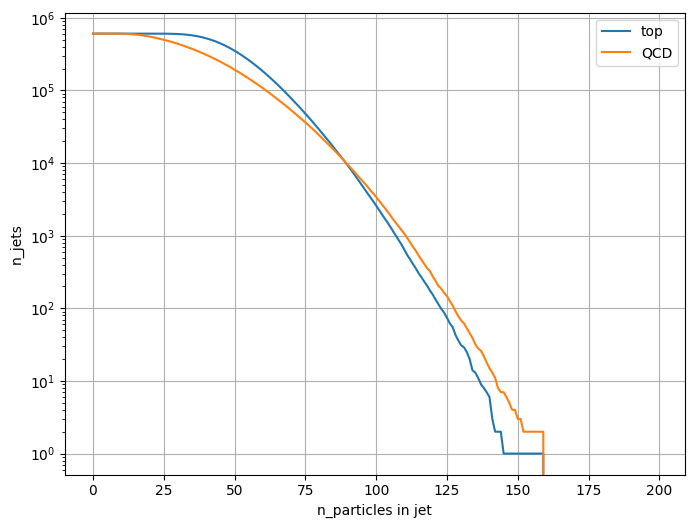

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(n_particles_top, label="top")
ax.plot(n_particles_QCD, label="QCD")
ax.grid()
ax.legend()
ax.set(
    xlabel="n_particles in jet",
    ylabel = "n_jets",
    yscale="log"
)
plt.show()